<img src="images/csdms_logo.jpg">

# Using a BMI: Waves

This example explores how to use a BMI implementation using the [Waves model](http://csdms.colorado.edu/wiki/Model_help:Waves) as an example.

## Links

* [Waves source code](https://github.com/csdms/cem-old): Look at the files that have *waves* in their name.
* [Waves description on CSDMS](http://csdms.colorado.edu/wiki/Model_help:Waves): Detailed information on the Waves model.

# Interacting with the Waves BMI using Python

Some magic that allows us to view images within the notebook.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Import the `Waves` class, and instantiate it. In Python, a model with a BMI will have no arguments for its constructor. Note that although the class has been instantiated, it's not yet ready to be run. We'll get to that later!

In [2]:
from csdms.Waves import Waves
waves = Waves()

Even though we can't run our waves model yet, we can still get some information about it. *Just don't try to run it.* Some things we can do with our model are get the names of the input variables.

In [3]:
waves.get_output_var_names()[1]

array([ 'sea_surface_water_wave__min_of_increment_of_azimuth_angle_of_opposite_of_phase_velocity',
       'sea_surface_water_wave__azimuth_angle_of_opposite_of_phase_velocity',
       'sea_surface_water_wave__mean_of_increment_of_azimuth_angle_of_opposite_of_phase_velocity',
       'sea_surface_water_wave__max_of_increment_of_azimuth_angle_of_opposite_of_phase_velocity',
       'sea_surface_water_wave__height', 'sea_surface_water_wave__period'], dtype=object)

Or the output variables.

In [4]:
waves.get_input_var_names()[1]

array(['sea_surface_water_wave__height', 'sea_surface_water_wave__period',
       'sea_shoreline_wave~incoming~deepwater__ashton_et_al_approach_angle_highness_parameter',
       'sea_shoreline_wave~incoming~deepwater__ashton_et_al_approach_angle_asymmetry_parameter'], dtype=object)

We can also get information about specific variables. Here we'll look at some info about wave direction. This is the main output of the Waves model. Notice that BMI components always use [CSDMS standard names](http://csdms.colorado.edu/wiki/CSDMS_Standard_Names). The CSDMS Standard Name for wave angle is,

    "sea_surface_water_wave__azimuth_angle_of_opposite_of_phase_velocity"

Quite a mouthful, I know. With that name we can get information about that variable and the grid that it is on (it's actually not a one).

In [5]:
angle_name = 'sea_surface_water_wave__azimuth_angle_of_opposite_of_phase_velocity'

print "Data type: %s" % waves.get_var_type(angle_name)[1]
print "Units: %s" % waves.get_var_units(angle_name)[1]
print "Grid id: %d" % waves.get_var_grid(angle_name)[1]
print "Number of elements in grid: %d" % waves.get_grid_size(0)[1]
print "Type of grid: %s" % waves.get_grid_type(0)[1]

Data type: double
Units: radians
Grid id: 0
Number of elements in grid: 1
Type of grid: scalar


OK. We're finally ready to run the model. Well not quite. First we initialize the model with the BMI **initialize** method. Normally we would pass it a string that represents the name of an input file. For this example we'll pass **None**, which tells Waves to use some defaults.

In [6]:
waves.initialize(None)

0

Before running the model, let's set a couple input parameters. These two parameters represent the frequency for which waves approach the shore at a high angle and if they come from a prefered direction.

In [7]:
import numpy as np

waves.set_value('sea_shoreline_wave~incoming~deepwater__ashton_et_al_approach_angle_asymmetry_parameter', np.array((.25, )))
waves.set_value('sea_shoreline_wave~incoming~deepwater__ashton_et_al_approach_angle_highness_parameter', np.array((.7, )))

0

To advance the model in time, we use the **update** method. We'll advance the model one day. 

In [8]:
waves.update(1.)

0

Let's double-check that the model advanced to the given time and see what the new wave angle is.

In [9]:
print 'Current model time: %f' % waves.get_current_time()[1]
val = np.empty((1., ))
waves.get_value(angle_name, val)
print 'The current wave angle is: %f' % val[0]

Current model time: 1.000000
The current wave angle is: -0.062965


We'll put all this in a loop and advance the model in time to generate a time series of waves angles.

In [10]:
angles = np.empty(4000)
for time in xrange(4000):
    waves.update(time)
    waves.get_value(angle_name, val)
    angles[time] = val[0]

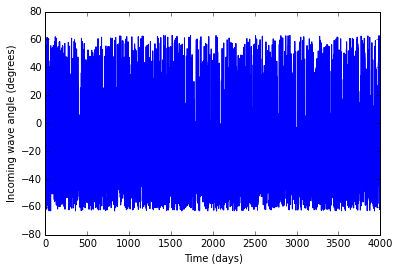

In [11]:
plot(np.array(angles) * 180 / np.pi)
xlabel('Time (days)')
ylabel('Incoming wave angle (degrees)')

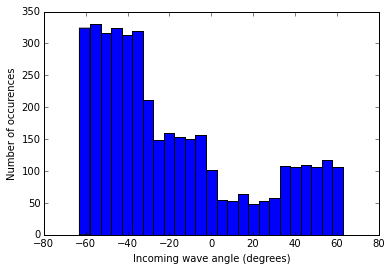

In [12]:
hist(np.array(angles) * 180 / np.pi, bins=25)
xlabel('Incoming wave angle (degrees)')
ylabel('Number of occurences')